# 데이터 집단화(Groupby)
pandas의 groupby 함수는 데이터 분석에서 매우 강력한 도구로,
"Split-Apply-Combine" 패턴을 통해 데이터를 그룹별로 나눈 후( Split ), 각 그룹에 함수를 적용하여( Apply ) 결과를 다시 하나의 객체로 합치는( Combine ) 작업을 수행합니다. 즉, 데이터의 특정 컬럼을 기준으로 행들을 그룹화하여, 각 그룹별로 집계(합계, 평균, 개수 등)나 변환, 필터링 등의 작업을 할 수 있게 해줍니다.

In [35]:
import pandas as pd

df = pd.read_csv("Groupby.csv")
df

,과일,수량,가격,구매처
0,사과,10,1000,온라인
1,바나나,20,800,오프라인
2,사과,15,1200,온라인
3,바나나,25,750,오프라인
4,오렌지,30,1500,온라인
5,사과,5,1100,오프라인
6,포도,12,900,온라인
7,포도,18,950,오프라인
8,바나나,22,820,온라인
9,오렌지,28,1480,오프라인


* 그룹별 수량 합계 구하기

In [36]:
# '과일' 컬럼을 기준으로 그룹화한 후, 각 그룹의 '수량' 합계 계산
A = df.groupby('과일')['수량'].sum().sort_values(ascending = False)
A

과일
바나나    67
오렌지    58
사과     30
포도     30
Name: 수량, dtype: int64

<Axes: xlabel='과일'>

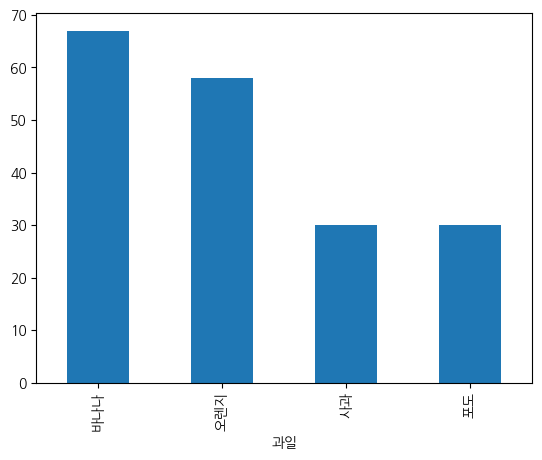

In [37]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib
A.plot.bar()

* 여러 그룹별 수량 합계 구하기

In [38]:
df.groupby(['구매처', '과일'])['수량'].sum().to_frame().reset_index()

,구매처,과일,수량
0,오프라인,바나나,45
1,오프라인,사과,5
2,오프라인,오렌지,28
3,오프라인,포도,18
4,온라인,바나나,22
5,온라인,사과,25
6,온라인,오렌지,30
7,온라인,포도,12


* 여러 개의 집계 함수 적용하기

In [39]:
df.groupby('과일')[['수량', '가격']].mean()

,수량,가격
과일,,
바나나,22.333333,790.0
사과,10.000000,1100.0
오렌지,29.000000,1490.0
포도,15.000000,925.0


In [40]:
df.groupby('과일').agg({'수량': ['sum', 'mean'], '가격': ['min', 'max']})

수량               가격      
    sum       mean   min   max
과일                            
바나나  67  22.333333   750   820
사과   30  10.000000  1000  1200
오렌지  58  29.000000  1480  1500
포도   30  15.000000   900   950

* apply() 메서를 활용하여 사용자 정의 함수 적용하기

In [41]:
import warnings
warnings.filterwarnings("ignore")

# 사용자 정의 함수: 그룹 내에서 수량과 가격 컬럼의 합계를 계산
def group_sum(group):
    return group[['수량', '가격']].sum()

df.groupby("과일").apply(group_sum)

,수량,가격
과일,,
바나나,67,2370
사과,30,3300
오렌지,58,2980
포도,30,1850


In [42]:
# 각 그룹별로 수량 기준 내림차순 정렬 후, 수량이 20보다 큰 행만 반환.
def sort_and_filter(group):
    group = group.sort_values('수량', ascending=False)
    return group[group['수량'] > 20]

A = df.groupby("과일").apply(sort_and_filter)
A

과일  수량    가격   구매처
과일                        
바나나 3  바나나  25   750  오프라인
    8  바나나  22   820   온라인
오렌지 4  오렌지  30  1500   온라인
    9  오렌지  28  1480  오프라인

In [43]:
def complex_operation(group):
    # 그룹 내에서 수량과 가격의 합, 평균, 최대값을 계산한 결과를 하나의 DataFrame으로 반환
    result = pd.DataFrame({
        'sum': [group['수량'].sum()],
        'mean_price': [group['가격'].mean()],
        'max': [group['수량'].max()]
    })
    return result

df.groupby("과일").apply(complex_operation)

,,sum,mean_price,max
과일,,,,
바나나,0,67,790.0,25
사과,0,30,1100.0,15
오렌지,0,58,1490.0,30
포도,0,30,925.0,18


* 그룹별 데이터 변환 (Transformation)

In [44]:
# '과일'별로 수량의 평균을 구하고, 각 행에 해당 그룹의 평균값을 부여
df['수량평균'] = df.groupby('과일')['수량'].transform('mean')
df

,과일,수량,가격,구매처,수량평균
0,사과,10,1000,온라인,10.000000
1,바나나,20,800,오프라인,22.333333
2,사과,15,1200,온라인,10.000000
3,바나나,25,750,오프라인,22.333333
4,오렌지,30,1500,온라인,29.000000
5,사과,5,1100,오프라인,10.000000
6,포도,12,900,온라인,15.000000
7,포도,18,950,오프라인,15.000000
8,바나나,22,820,온라인,22.333333
9,오렌지,28,1480,오프라인,29.000000


* 그룹별 필터링 (Filtering)

In [45]:
# '과일'별로 수량 합계가 40 이상인 그룹만 필터링
df.groupby('과일').filter(lambda x: x['수량'].sum() >= 40)

,과일,수량,가격,구매처,수량평균
1,바나나,20,800,오프라인,22.333333
3,바나나,25,750,오프라인,22.333333
4,오렌지,30,1500,온라인,29.000000
8,바나나,22,820,온라인,22.333333
9,오렌지,28,1480,오프라인,29.000000


* 조금 더 큰 데이터로 집단화 해보기

In [46]:
df = pd.read_csv("gapminder.tsv", sep = '\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [47]:
A = df.groupby("year")['lifeExp'].mean()
A

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [48]:
df.groupby("year")['lifeExp'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360


<Axes: xlabel='year'>

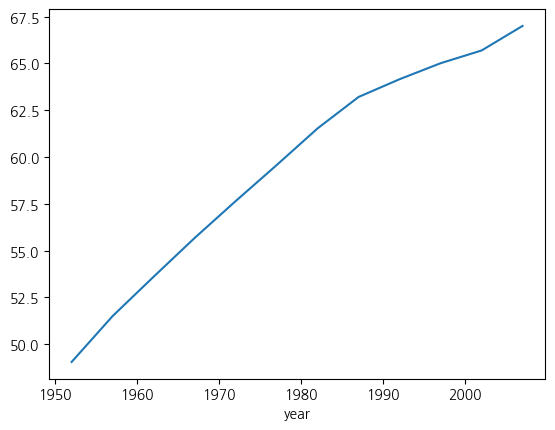

In [49]:
A.plot()

In [50]:
A = df.groupby(['year', 'continent'])['lifeExp'].mean()
A.to_csv("result.csv")
A

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

In [51]:
# 대륙별 국가 개수 세기.
df.groupby("continent")['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [52]:
# 연도별 기대수명이 가장 큰 나라 찾기
idx = df.groupby("year")['lifeExp'].idxmax()
df.loc[idx]

,country,continent,year,lifeExp,pop,gdpPercap
1140,Norway,Europe,1952,72.670,3327728,10095.421720
685,Iceland,Europe,1957,73.470,165110,9244.001412
686,Iceland,Europe,1962,73.680,182053,10350.159060
1467,Sweden,Europe,1967,74.160,7867931,15258.296970
1468,Sweden,Europe,1972,74.720,8122293,17832.024640
689,Iceland,Europe,1977,76.110,221823,19654.962470
798,Japan,Asia,1982,77.110,118454974,19384.105710
799,Japan,Asia,1987,78.670,122091325,22375.941890
800,Japan,Asia,1992,79.360,124329269,26824.895110
801,Japan,Asia,1997,80.690,125956499,28816.584990


In [53]:
# 연도별 기대수명이 가장 낮은 나라 찾기
idx = df.groupby("year")['lifeExp'].idxmin()
df.loc[idx]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
1348,Sierra Leone,Africa,1972,35.400,2879013,1353.759762
221,Cambodia,Asia,1977,31.220,6978607,524.972183
1350,Sierra Leone,Africa,1982,38.445,3464522,1465.010784
43,Angola,Africa,1987,39.906,7874230,2430.208311
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
1293,Rwanda,Africa,1997,36.087,7212583,589.944505


In [54]:
# 연도별 인구수가 가장 많은 나라 찾기.
idx = df.groupby("year")['pop'].idxmax()
df.loc[idx]

,country,continent,year,lifeExp,pop,gdpPercap
288,China,Asia,1952,44.00000,556263527,400.448611
289,China,Asia,1957,50.54896,637408000,575.987001
290,China,Asia,1962,44.50136,665770000,487.674018
291,China,Asia,1967,58.38112,754550000,612.705693
292,China,Asia,1972,63.11888,862030000,676.900092
293,China,Asia,1977,63.96736,943455000,741.237470
294,China,Asia,1982,65.52500,1000281000,962.421381
295,China,Asia,1987,67.27400,1084035000,1378.904018
296,China,Asia,1992,68.69000,1164970000,1655.784158
297,China,Asia,1997,70.42600,1230075000,2289.234136


## 연습문제 (gapminder 데이터 활용)
1. year 컬럼을 기준으로 그룹화하여 각 연도별 평균 pop(인구수)를 계산하고 출력하세요.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data/Gapminder.tsv", sep = "\t")

df.groupby("year")["pop"].mean()

year
1952    1.695040e+07
1957    1.876341e+07
1962    2.042101e+07
1967    2.265830e+07
1972    2.518998e+07
1977    2.767638e+07
1982    3.020730e+07
1987    3.303857e+07
1992    3.599092e+07
1997    3.883947e+07
2002    4.145759e+07
2007    4.402122e+07
Name: pop, dtype: float64

2. continent 컬럼을 기준으로 그룹화하여 각 대륙별 평균 기대수명(lifeExp)를 계산하고 내림차순으로 정렬하여 출력하세요.

In [7]:
df.groupby("continent")["lifeExp"].mean().sort_values(ascending = False)

continent
Oceania     74.326208
Europe      71.903686
Americas    64.658737
Asia        60.064903
Africa      48.865330
Name: lifeExp, dtype: float64

3. continent 컬럼을 기준으로 그룹화한 후, 각 대륙별 lifeExp(기대수명)의 최댓값과 최솟값을 한 번에 구해 출력하세요.

In [20]:
df.groupby("continent").agg({"lifeExp" : ["max", "min"]})

# df.groupby("continent")["lifeExp"].agg(["max", "min"])

lifeExp        
              max     min
continent                
Africa     76.442  23.599
Americas   80.653  37.579
Asia       82.603  28.801
Europe     81.757  43.585
Oceania    81.235  69.120

4. year 컬럼을 기준으로 그룹화하여 각 연도별 인구(pop)의 총합과 평균 gdpPercap을 함께 계산하여 출력하세요.

In [21]:
df.groupby("year").agg({"pop" : ["sum"],
                      "gdpPercap" : ["mean"]})       # ["mean"] 이런식으로 묶어줘야 sum인지 mean인지 이름표 뜸

,pop,gdpPercap
,sum,mean
year,,
1952,2406957150,3725.276046
1957,2664404580,4299.408345
1962,2899782974,4725.812342
1967,3217478384,5483.653047
1972,3576977158,6770.082815
1977,3930045807,7313.166421
1982,4289436840,7518.901673
1987,4691477418,7900.920218


5. country 컬럼을 기준으로 그룹화하여 각 국가별 평균 lifeExp를 계산한 후, 평균 기대수명이 높은 순(내림차순)으로 정렬하여 상위 10개 국가를 출력하세요.

In [11]:
df.groupby("country")["lifeExp"].mean().sort_values(ascending = False).head(10)

country
Iceland        76.511417
Sweden         76.177000
Norway         75.843000
Netherlands    75.648500
Switzerland    75.565083
Canada         74.902750
Japan          74.826917
Australia      74.662917
Denmark        74.370167
France         74.348917
Name: lifeExp, dtype: float64

6. continent 컬럼을 기준으로 그룹화하여 각 대륙별 gdpPercap(1인당 GDP)의 중앙값을 계산하세요.

In [12]:
df.groupby("continent")["gdpPercap"].median()

continent
Africa       1192.138217
Americas     5465.509853
Asia         2646.786844
Europe      12081.749115
Oceania     17983.303955
Name: gdpPercap, dtype: float64

7. year 컬럼을 기준으로 그룹화하여 각 연도별 인구(pop)의 총합을 계산하세요. 그리고 
계산된 결과를 이용해 인구 총합이 가장 큰 연도와 가장 작은 연도를 각각 찾으세요.

In [34]:
### 좀더찾아보기.. 처음과끝만꺼내는법?


df.groupby("year")["pop"].sum().sort_values()

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: pop, dtype: int64

8. 각 연도별로 gdpPercap(1인당 GDP)가 가장 높은 국가를 찾아, 해당 국가 이름과 그 값을 출력하세요.

In [30]:
idx = df.groupby("year")["gdpPercap"].idxmax()
df.loc[idx][["country", "gdpPercap"]]

,country,gdpPercap
852,Kuwait,108382.35290
853,Kuwait,113523.13290
854,Kuwait,95458.11176
855,Kuwait,80894.88326
856,Kuwait,109347.86700
857,Kuwait,59265.47714
1314,Saudi Arabia,33693.17525
1147,Norway,31540.97480
860,Kuwait,34932.91959
1149,Norway,41283.16433
